In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import random

<br>

### Data collection

In [2]:
# importing data
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# checking for null values in train data
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# checking for null values in test data
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<br>
<br>
<br>

### Train data

#### home planet

In [7]:
# extracting group and last name
group = train_data.PassengerId.apply(lambda x: int(x.split("_")[0]))
last_name = train_data.Name.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[1])

In [8]:
# creating new dataframe with group, last_name and home_planet
group_last_name_home_planet = pd.DataFrame(data={'group': group, 'last_name': last_name, 'home_planet': train_data.HomePlanet})

group_last_name_home_planet.head()

,group,last_name,home_planet
0,1,Ofracculy,Europa
1,2,Vines,Earth
2,3,Susent,Europa
3,3,Susent,Europa
4,4,Santantines,Earth


In [9]:
# checking for null values
group_last_name_home_planet.isna().sum()

group            0
last_name      200
home_planet    201
dtype: int64

In [10]:
# number of unique home planets for each group
# grouped by number of unique values
group_last_name_home_planet.groupby('group').nunique().home_planet.value_counts()

1    6107
0     110
Name: home_planet, dtype: int64

6107 groups are from 1 unique home planet<br>
110 groups are from 0 unique home planet (where home planet is missing)

In [11]:
# number of unique home planets for each last_name
# grouped by number of unique values
group_last_name_home_planet.groupby('last_name').nunique().home_planet.value_counts()

1    2209
0       8
Name: home_planet, dtype: int64

2209 last names are from 1 unique home planet<br>
8 last names are from 0 unique home planet (where home planet is missing)

note:
- passengers in each group, travel from same home planet
- passengers with same last name are from same planet

action:
- fill missing values in home planet using above two findings

In [12]:
# will hold home_planet for each group
group_home_planet_dict = {}
# will hold home_planet for each last name
last_name_home_planet_dict = {}

def link_to_home_planet(x):
    """
    map each group to it's home planet and
    map each last name to it's home planet
    """
    # if group not present in dict
    if x.group not in group_home_planet_dict:
        # if home planet is not null
        if pd.notna(x.home_planet):
            # add group to the dict
            group_home_planet_dict[x.group] = x.home_planet
    
    # if last name is not null
    if pd.notna(x.last_name):
        # if last name not in dict
        if x.last_name not in last_name_home_planet_dict:
            # if home planet is not null
            if pd.notna(x.home_planet):
                # add last name to the dict
                last_name_home_planet_dict[x.last_name] = x.home_planet

def fill_home_planet(x):
    """
    fill missing home planet using group number
    and last name of the passenger
    """
    # if home planet is missing
    if pd.isna(x.home_planet):
        # if group present in group dict
        if x.group in group_home_planet_dict:
            # fill using group
            k = x.copy()
            k.home_planet = group_home_planet_dict[x.group]
            return k
        # else if last name in dict
        elif pd.notna(x.last_name) and x.last_name in last_name_home_planet_dict:
            # fill using last name
            k = x.copy()
            k.home_planet = last_name_home_planet_dict[x.last_name]
            return k
        # else return as it is
        else:
            return x
    # else return as it is
    else:
        return x

In [13]:
# mapping group and last_name to home planet
group_last_name_home_planet.apply(lambda x: link_to_home_planet(x), axis=1)

# filling missing home planet
group_last_name_home_planet_2 = group_last_name_home_planet.apply(lambda x: fill_home_planet(x), axis=1)

# inspecting
group_last_name_home_planet_2.head()

,group,last_name,home_planet
0,1,Ofracculy,Europa
1,2,Vines,Earth
2,3,Susent,Europa
3,3,Susent,Europa
4,4,Santantines,Earth


In [14]:
# checking null values
group_last_name_home_planet_2.isna().sum()

group            0
last_name      200
home_planet     12
dtype: int64

As only 12 values are remaining, filling them with mode

In [15]:
# filling remaining values with mode
group_last_name_home_planet_2.home_planet.fillna(value=group_last_name_home_planet_2.home_planet.mode()[0], inplace=True)

In [16]:
# checking null values
group_last_name_home_planet_2.isna().sum()

group            0
last_name      200
home_planet      0
dtype: int64

In [17]:
# updating train_data
train_data.HomePlanet = group_last_name_home_planet_2.home_planet

# checking updated null values
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<br>

#### spendings

In [18]:
# combining cryo and spending features
cryo_total = pd.DataFrame(data={'cryo': train_data.CryoSleep, 'room_service': train_data.RoomService, 'food_court': train_data.FoodCourt, 'shopping_mall': train_data.ShoppingMall, 'spa': train_data.Spa, 'vr_deck': train_data.VRDeck})
cryo_total.head()

,cryo,room_service,food_court,shopping_mall,spa,vr_deck
0,False,0.0,0.0,0.0,0.0,0.0
1,False,109.0,9.0,25.0,549.0,44.0
2,False,43.0,3576.0,0.0,6715.0,49.0
3,False,0.0,1283.0,371.0,3329.0,193.0
4,False,303.0,70.0,151.0,565.0,2.0


In [19]:
# checking null values
cryo_total.isna().sum()

cryo             217
room_service     181
food_court       183
shopping_mall    208
spa              183
vr_deck          188
dtype: int64

In [20]:
# records where cryo sleep is True
cryo_total[(pd.notna(cryo_total.cryo)) & (cryo_total.cryo)].head()

,cryo,room_service,food_court,shopping_mall,spa,vr_deck
7,True,0.0,0.0,0.0,0.0,NaN
9,True,0.0,0.0,0.0,0.0,0.0
10,True,0.0,0.0,NaN,0.0,0.0
18,True,0.0,0.0,0.0,0.0,0.0
21,True,0.0,0.0,0.0,0.0,0.0


In [21]:
# sum of spendings where passenger is in cryo sleep
cryo_total[(pd.notna(cryo_total.cryo)) & (cryo_total.cryo)].sum()

cryo             3037
room_service      0.0
food_court        0.0
shopping_mall     0.0
spa               0.0
vr_deck           0.0
dtype: object

note:
- passengers in cryo sleep have 0.0 spendings. That means they are asleep throughout the journey

action:
- replace all null values with 0.0 where cryo sleep is True

In [22]:
def cryo_spending_0(x):
    """
    set all spendings to 0.0 where passenger
    is in cryo sleep
    """
    if pd.notna(x.cryo) and x.cryo:
        k = x.copy()
        k.room_service = 0.0
        k.food_court = 0.0
        k.shopping_mall = 0.0
        k.spa = 0.0
        k.vr_deck = 0.0
        return k
    else:
        return x

In [23]:
# updating cryo_total
cryo_total_2 = cryo_total.apply(lambda x: cryo_spending_0(x), axis=1)

# inspecting new dataframe
cryo_total_2.head()

,cryo,room_service,food_court,shopping_mall,spa,vr_deck
0,False,0.0,0.0,0.0,0.0,0.0
1,False,109.0,9.0,25.0,549.0,44.0
2,False,43.0,3576.0,0.0,6715.0,49.0
3,False,0.0,1283.0,371.0,3329.0,193.0
4,False,303.0,70.0,151.0,565.0,2.0


In [24]:
# checking null values
cryo_total_2.isna().sum()

cryo             217
room_service     113
food_court       113
shopping_mall    112
spa              118
vr_deck          126
dtype: int64

note:
- by inspecting the data, we observe that passengers generally tend to do similar spending at all 5 places
- if they have high spendings in 3 places, they are tend to spend high in remaining 2 places and vice versa
- that is, they have similarity in spending

action:
- as passengers show similar behaviour in spending, we can use mean to impute missing value in places where spending is null

In [25]:
def fill_spending_mean(x: pd.Series):
    """
    fill null spending with average of non-null spendings
    """
    if x.drop("cryo").isna().any():
        k = x.drop("cryo")
        m = k.mean()
        k.fillna(m, inplace=True)
        k["cryo"] = x.cryo
        return k
    else:
        return x

In [26]:
# updating cryo total
cryo_total_3 = cryo_total_2.apply(lambda x: fill_spending_mean(x), axis=1)
cryo_total_3.head()

,cryo,food_court,room_service,shopping_mall,spa,vr_deck
0,False,0.0,0.0,0.0,0.0,0.0
1,False,9.0,109.0,25.0,549.0,44.0
2,False,3576.0,43.0,0.0,6715.0,49.0
3,False,1283.0,0.0,371.0,3329.0,193.0
4,False,70.0,303.0,151.0,565.0,2.0


In [27]:
# checking null values
cryo_total_3.isna().sum()

cryo             217
food_court         0
room_service       0
shopping_mall      0
spa                0
vr_deck            0
dtype: int64

In [28]:
# updating train_data
train_data.FoodCourt = cryo_total_3.food_court
train_data.RoomService = cryo_total_3.room_service
train_data.ShoppingMall = cryo_total_3.shopping_mall
train_data.Spa = cryo_total_3.spa
train_data.VRDeck = cryo_total_3.vr_deck

In [29]:
# inspecting updated dataframe
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

<br>

#### destination

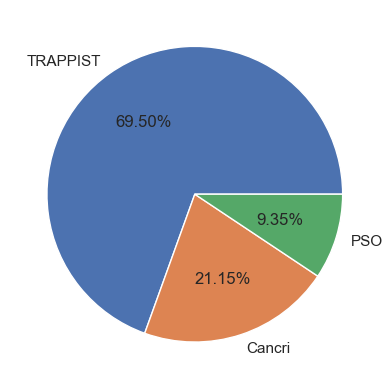

In [41]:
# create destination pie chart
plt.pie(x=train_data.Destination.value_counts(), labels=['TRAPPIST', 'Cancri', 'PSO'], autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

No specific relation could be found for Destination feature yet.<br>
So imputing missing values with mode for now as it covers almost 70% in proportion.

In [42]:
# taking out destination
destination = train_data.Destination
destination.head()

0    TRAPPIST-1e
1    TRAPPIST-1e
2    TRAPPIST-1e
3    TRAPPIST-1e
4    TRAPPIST-1e
Name: Destination, dtype: object

In [45]:
# filling missing values with mode
# updating train_data
train_data.Destination = destination.fillna(value=destination.mode()[0])

In [47]:
# checking for null values
train_data.Destination.isna().any()

False

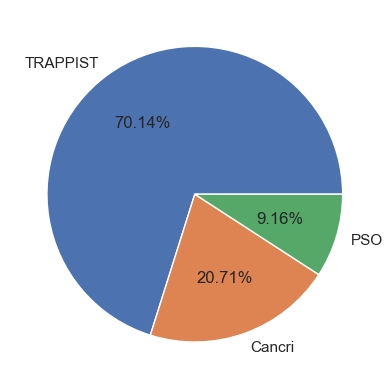

In [48]:
# looking at updated destination
plt.pie(x=train_data.Destination.value_counts(), labels=['TRAPPIST', 'Cancri', 'PSO'], autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

Not much change in proprotions

<br>

#### cryo sleep

In [49]:
# seperating deck, num_in_cabin and side from Cabin feature
deck = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[0])
num_in_cabin = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else int(x.split("/")[1]))
side = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[2])

In [52]:
# checking null values
train_data.CryoSleep.isna().sum()

217

In [51]:
# cryo sleep True and False count
train_data.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

We will focus on finding the relations where cryo sleep is True, as it is the minority class

In [76]:
# categorising age feature
# value for bins is discussed in EDA
age_bins = pd.cut(x=train_data.Age, bins=[-1, 18, 40, 80], labels=['child', 'adult', 'old'])

Let's see how **cryo sleep** behaves for different combination of **age_bin**, **home_planet** and **destination** features

In [80]:
def destination_age_bin(x):
    """
    combining destination and age categories
    """
    if pd.notna(x.age_bin):
        if x.Destination == 'TRAPPIST-1e':
            if x.age_bin == 'child':
                return 't_child'
            elif x.age_bin == 'adult':
                return 't_adult'
            elif x.age_bin == 'old':
                return 't_old'
        elif x.Destination == '55 Cancri e':
            if x.age_bin == 'child':
                return 'c_child'
            elif x.age_bin == 'adult':
                return 'c_adult'
            elif x.age_bin == 'old':
                return 'c_old'
        elif x.Destination == 'PSO J318.5-22':
            if x.age_bin == 'child':
                return 'p_child'
            elif x.age_bin == 'adult':
                return 'p_adult'
            elif x.age_bin == 'old':
                return 'p_old'
    else:
        np.nan

In [90]:
def home_planet_age_bin(x):
    """
    combining home planet and age categories
    """
    if pd.notna(x.age_bin):
        if x.Destination == 'Europa':
            if x.age_bin == 'child':
                return 'eu_child'
            elif x.age_bin == 'adult':
                return 'eu_adult'
            elif x.age_bin == 'old':
                return 'eu_old'
        elif x.Destination == 'Earth':
            if x.age_bin == 'child':
                return 'ea_child'
            elif x.age_bin == 'adult':
                return 'ea_adult'
            elif x.age_bin == 'old':
                return 'ea_old'
        elif x.Destination == 'Mars':
            if x.age_bin == 'child':
                return 'm_child'
            elif x.age_bin == 'adult':
                return 'm_adult'
            elif x.age_bin == 'old':
                return 'm_old'
    else:
        np.nan

In [91]:
def home_planet_dest(x):
    """
    combining home planet and destination
    """
    if x.home_planet == 'Europa':
        if x.destination == 'TRAPPIST-1e':
            return 'eu_t'
        elif x.destination == '55 Cancri e':
            return 'eu_c'
        elif x.destination == 'PSO J318.5-22':
            return 'eu_p'
    elif x.home_planet == 'Earth':
        if x.destination == 'TRAPPIST-1e':
            return 'ea_t'
        elif x.destination == '55 Cancri e':
            return 'ea_c'
        elif x.destination == 'PSO J318.5-22':
            return 'ea_p'
    elif x.home_planet == 'Mars':
        if x.destination == 'TRAPPIST-1e':
            return 'm_t'
        elif x.destination == '55 Cancri e':
            return 'm_c'
        elif x.destination == 'PSO J318.5-22':
            return 'm_p'

In [81]:
# destination age category
dest_age_bin = pd.DataFrame({'Destination': train_data.Destination, 'age_bin': age_bins}).apply(lambda x: destination_age_bin(x), axis=1)

In [86]:
# home planet age category
home_age_bin = pd.DataFrame({'home_planet': train_data.HomePlanet, 'age_bin': age_bins}).apply(lambda x: home_planet_age_bin(x), axis=1)

In [92]:
# home planet destination
home_dest = pd.DataFrame({'home_planet': train_data.HomePlanet, 'destination': train_data.Destination}).apply(lambda x: home_planet_dest(x), axis=1)

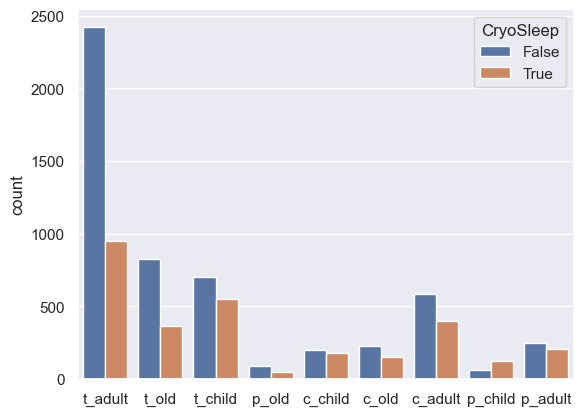

In [83]:
# dest_age_bin and cryo sleep
sns.countplot(x=dest_age_bin, hue=train_data.CryoSleep)
plt.show()

note:
- a child travelling to PSO is more likely to be in cryo sleep

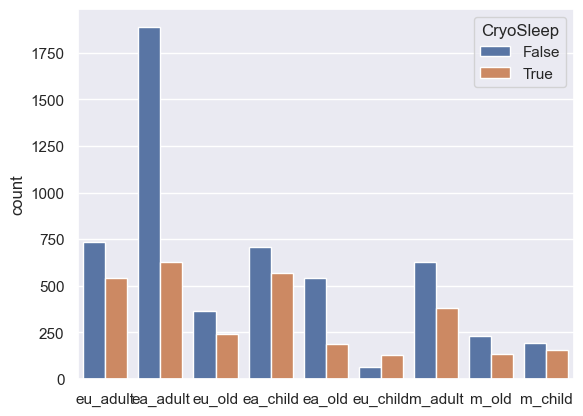

In [88]:
# home_age_bin and cryo sleep
sns.countplot(x=home_age_bin, hue=train_data.CryoSleep)
plt.show()

note:
- a child travelling from Europa is more likely to be in cryo sleep

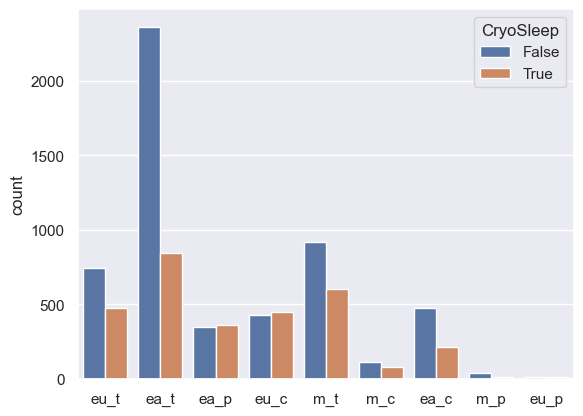

In [93]:
# home_dest and cryo sleep
sns.countplot(x=home_dest, hue=train_data.CryoSleep)
plt.show()

note:
- passengers travelling from earth to PSO are more likely to be in cryo sleep
- passengers travelling from earth to Capri are more likely to be in cryo sleep

action:
- fill missing value for cryo sleep for above cases with True

In [94]:
# cryo dataframe
cryo_df = pd.DataFrame({'cryo': train_data.CryoSleep, 'dest_age': dest_age_bin, 'home_age': home_age_bin, 'home_dest': home_dest})
cryo_df.head()

,cryo,dest_age,home_age,home_dest
0,False,t_adult,eu_adult,eu_t
1,False,t_adult,ea_adult,ea_t
2,False,t_old,eu_old,eu_t
3,False,t_adult,eu_adult,eu_t
4,False,t_child,ea_child,ea_t


In [95]:
# checking null values
cryo_df.isna().sum()

cryo         217
dest_age     179
home_age     179
home_dest      0
dtype: int64

In [96]:
def fill_cryo_missing(x: pd.Series):
    """
    fill missing values in cryo sleep
    """
    if pd.isna(x.cryo):
        if pd.notna(x.dest_age) and x.dest_age == 'p_child':
            k = x.copy()
            k.cryo = True
            return k
        elif pd.notna(x.home_age) and x.home_age == 'eu_child':
            k = x.copy()
            k.cryo = True
            return k
        elif x.home_dest in ['ea_p', 'eu_c']:
            k = x.copy()
            k.cryo = True
            return k
        else:
            return x
    else:
        return x

In [97]:
# updating cryo_df
cryo_df_2 = cryo_df.apply(lambda x: fill_cryo_missing(x), axis=1)
cryo_df_2.head()

,cryo,dest_age,home_age,home_dest
0,False,t_adult,eu_adult,eu_t
1,False,t_adult,ea_adult,ea_t
2,False,t_old,eu_old,eu_t
3,False,t_adult,eu_adult,eu_t
4,False,t_child,ea_child,ea_t


In [99]:
# checking null values
cryo_df_2.isna().sum()

cryo         166
dest_age     179
home_age     179
home_dest      0
dtype: int64

null values decreased from 217 -> 166

In [100]:
# old value count
cryo_df.cryo.value_counts()

False    5439
True     3037
Name: cryo, dtype: int64

In [101]:
# new value count
cryo_df_2.cryo.value_counts()

False    5439
True     3088
Name: cryo, dtype: int64

Filling remaining values with False

In [103]:
# filling remaining values with False
cryo_df_2.cryo.fillna(value=False, inplace=True)

In [105]:
# updated value count
cryo_df_2.cryo.value_counts()

False    5605
True     3088
Name: cryo, dtype: int64

In [107]:
# updating train_data
train_data.CryoSleep = cryo_df_2.cryo
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

<br>

#### vip

In [108]:
# vip value count
train_data.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

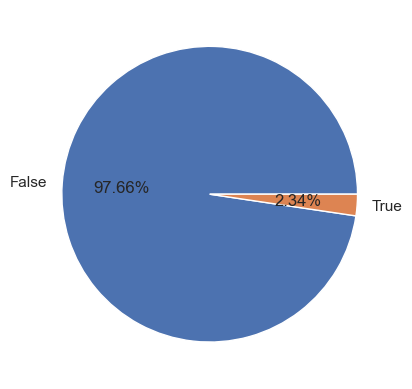

In [109]:
# creating vip pie plot
plt.pie(x=train_data.VIP.value_counts(), labels=['False', 'True'], autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

As False has very high majority, filling missing values with False will be reasonable

In [110]:
# filling missing values with False
train_data.VIP.fillna(value=False, inplace=True)

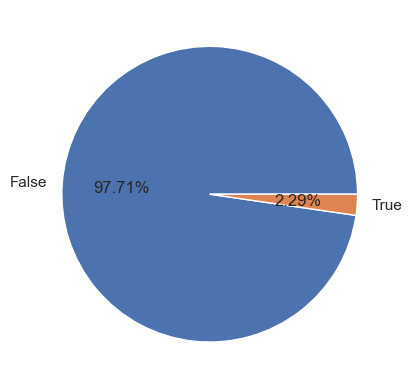

In [112]:
# updated plot
plt.pie(x=train_data.VIP.value_counts(), labels=['False', 'True'], autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

As we can see, the ratio didn't change that much<br>
97.66 -> 97.71

<br>

#### age

In [2]:
train_data.Age.isna().sum()

NameError: name 'train_data' is not defined

In [117]:
# descriptive statistics for age feature
train_data.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

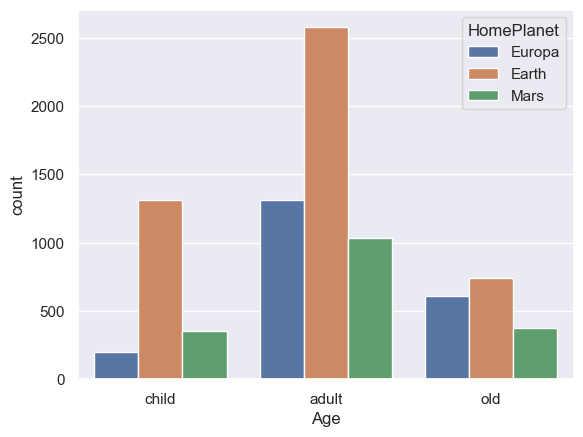

In [115]:
# age bins for various home planets
sns.countplot(x=age_bins, hue=train_data.HomePlanet)
plt.show()

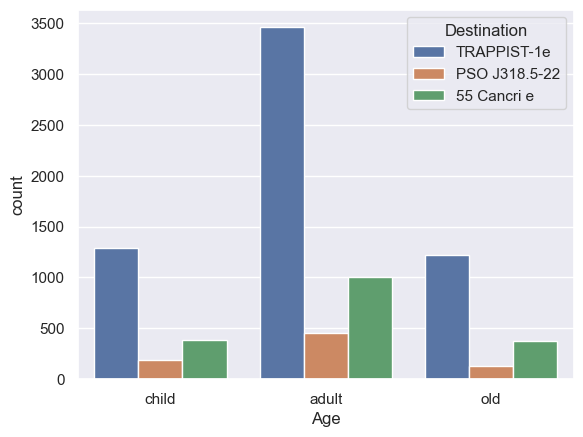

In [116]:
# age bins for various destinations
sns.countplot(x=age_bins, hue=train_data.Destination)
plt.show()

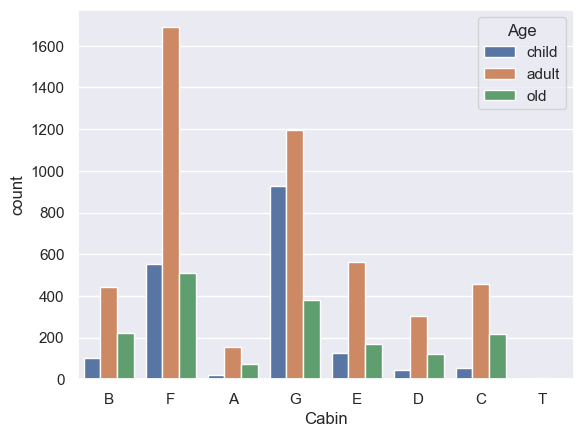

In [119]:
# age bins for decks
sns.countplot(x=deck, hue=age_bins)
plt.show()

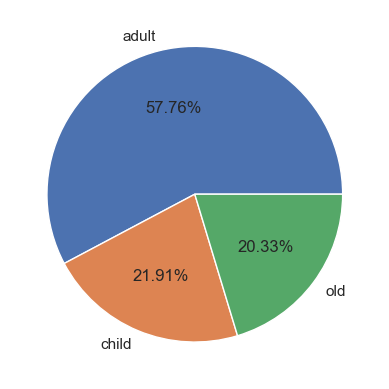

In [122]:
# age proportion
plt.pie(x=age_bins.value_counts(), labels=age_bins.value_counts().index, autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

No specific relation could be found for age, hence filling missing values with median

In [126]:
# filling missing values with median
train_data.Age.fillna(value=train_data.Age.median(), inplace=True)

In [128]:
# updating age bins
age_bins = pd.cut(x=train_data.Age, bins=[-1, 18, 40, 80], labels=['child', 'adult', 'old'])

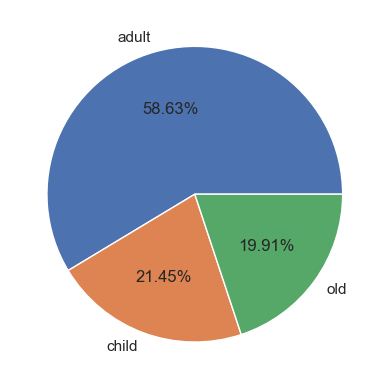

In [129]:
# updated pie plot
plt.pie(x=age_bins.value_counts(), labels=age_bins.value_counts().index, autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

Not too much difference in the proprotions

<br>

#### name

Note: we are using name feature only to identify the gender of the passenger

In [154]:
# checking missing values
train_data.Name.isna().sum()

200

In [149]:
# getting gender from first name
first_name = train_data.Name.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[0])
is_male = first_name.apply(lambda x: np.nan if pd.isna(x) else (0 if x[-1] in ["a", "e", "i", "y"] else 1))

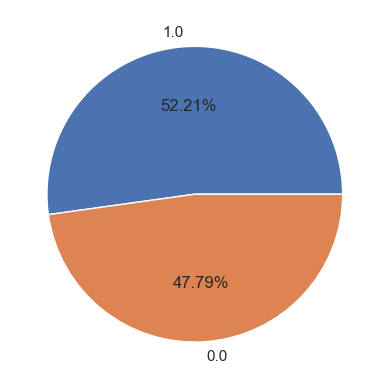

In [150]:
# pie plot
plt.pie(x=is_male.value_counts(), labels=is_male.value_counts().index, autopct='%0.2f%%', colors=sns.color_palette())
plt.show()

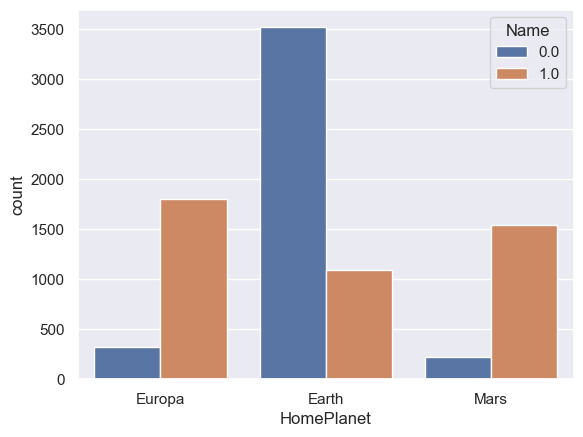

In [152]:
# home planet and gender
sns.countplot(x=train_data.HomePlanet, hue=is_male)
plt.show()

note:
- most of the passengers from Earth are female
- most of the passengers from Europa and Mars are male

action:
- filling missing values with female name, where home planet is Earth
- filling missing values with male name, where home planet is Europa and Mars

In [192]:
def fill_name_missing(x: pd.Series):
    """
    fill missing value with dummy male and female name
    """
    if pd.isna(x['name']):
        if x.home_planet == 'Earth':
            k = x.copy()
            k['name'] = 'dummya dummy'
            return k
        else:
            k = x.copy()
            k['name'] = 'dumm dummy'
            return k
    else:
        return x

In [193]:
# home planet, name dataframe
home_name = pd.DataFrame({'home_planet': train_data.HomePlanet, 'name': train_data.Name})
home_name.head()

,home_planet,name
0,Europa,Maham Ofracculy
1,Earth,Juanna Vines
2,Europa,Altark Susent
3,Europa,Solam Susent
4,Earth,Willy Santantines


In [194]:
# filling missing values and updating the dataframe
home_name_2 = home_name.apply(lambda x: fill_name_missing(x), axis=1)
home_name_2.head()

,home_planet,name
0,Europa,Maham Ofracculy
1,Earth,Juanna Vines
2,Europa,Altark Susent
3,Europa,Solam Susent
4,Earth,Willy Santantines


In [195]:
# checking null values
home_name_2.isna().sum()

home_planet    0
name           0
dtype: int64

In [197]:
# name value count
home_name_2.name.value_counts().head()

dummya dummy          112
dumm dummy             88
Elaney Webstephrey      2
Dia Cartez              2
Glenna Valezaley        2
Name: name, dtype: int64

In [199]:
# updating train_data
train_data.Name = home_name_2.name

In [200]:
# checking updated dataframe
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

<br>

#### cabin

In [209]:
# checking null values
train_data.Cabin.isna().sum()

199

In [201]:
# extracting cabin
cabin = train_data.Cabin
cabin.head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [202]:
# extracting deck, num_in_cabin and side
deck = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[0])
num_in_cabin = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else int(x.split("/")[1]))
side = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[2])

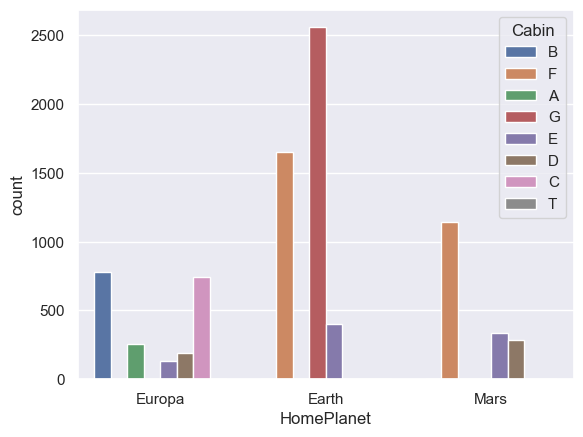

In [204]:
# home planet and deck
sns.countplot(x=train_data.HomePlanet, hue=deck)
plt.show()

note:
- Most passengers from Europa are in deck [B, A, C]
- Most passengers from Earth are in deck [F, G]
- Most passengers from Mars are in deck [F]

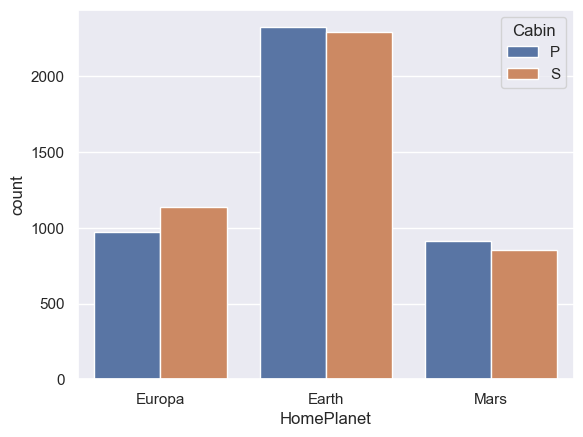

In [212]:
# home planet and side
sns.countplot(x=train_data.HomePlanet, hue=side)
plt.show()

note:
- More passengers from Europa are in side S
- More passengers from Earth and Mars are in side P

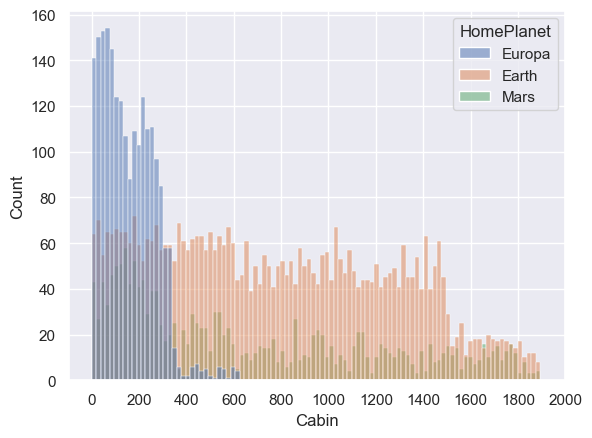

In [216]:
# num_in_cabin and home planet
sns.histplot(x=num_in_cabin, hue=train_data.HomePlanet, bins=100)
plt.xticks([i*200 for i in range(11)])
plt.show()

note:
- if the home planet is Europa, num_in_cabin is in range 0-300
- if the home planet is Earth, num_in_cabin is in range 0-1400
- if the home planet is Mars, num_in_cabin is in range 0-1890

action:
- using above 3 observations, filling missing values in deck, side and num_in_cabin

In [218]:
# home cabin dataframe
home_cabin = pd.DataFrame({'home_planet': train_data.HomePlanet, 'deck': deck, 'side': side, 'num_in_cabin': num_in_cabin})
home_cabin.head()

,home_planet,deck,side,num_in_cabin
0,Europa,B,P,0.0
1,Earth,F,S,0.0
2,Europa,A,S,0.0
3,Europa,A,S,0.0
4,Earth,F,S,1.0


In [219]:
# checking null values
home_cabin.isna().sum()

home_planet       0
deck            199
side            199
num_in_cabin    199
dtype: int64

In [280]:
def fill_cabin_missing(x: pd.Series):
    """
    fill missing values in cabin.
    A random approach is used instead of filling fixed values
    """
    if pd.isna(x.deck):
        k = x.copy()
        if x.home_planet == 'Earth':
            k.deck = random.choices(population=['F', 'G'], weights=[0.4, 0.6])
            k.side = 'P'
            k.num_in_cabin = random.choice(range(1400))
            return k
        elif x.home_planet == 'Europa':
            k.deck = random.choices(population=['A', 'B', 'C'], weights=[0.2, 0.4, 0.4])
            k.side = 'S'
            k.num_in_cabin = random.choice(range(300))
            return k
        elif x.home_planet == 'Mars':
            k.deck = 'F'
            k.side = 'P'
            k.num_in_cabin = random.choice(range(1890))
            return k
        else:
            return x
    else:
        return x

In [282]:
# updating homecabin
home_cabin_2 = home_cabin.apply(lambda x: fill_cabin_missing(x), axis=1)
home_cabin_2.head()

,home_planet,deck,side,num_in_cabin
0,Europa,B,P,0.0
1,Earth,F,S,0.0
2,Europa,A,S,0.0
3,Europa,A,S,0.0
4,Earth,F,S,1.0


In [283]:
# checking null values
home_cabin_2.isna().sum()

home_planet     0
deck            0
side            0
num_in_cabin    0
dtype: int64

In [286]:
def convert_to_cabin(x: pd.Series):
    """
    get cabin from deck, num_in_cabin and side
    """
    return f"{x.deck}/{int(x.num_in_cabin)}/{x.side}"

In [288]:
# updating cabin
cabin_2 = home_cabin_2.apply(lambda x: convert_to_cabin(x), axis=1)
cabin_2.head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
dtype: object

In [289]:
# checking null values
cabin_2.isna().sum()

0

In [290]:
# updating train_data
train_data.Cabin = cabin_2

In [291]:
# checking null values
train_data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
train_data.to_csv()

<br>

### test data